In [1]:
# def kmeans(k, X):
#     centroids = [random_pos for _ in range(k)]
#     while cetroids are changing significantly or max iter:
#         for instance in X:
#             min(distance(instance, centroid) for centroid in centroids)
#         centroids = mean(instance for instance in cluster)

In [2]:
from sklearn.cluster import KMeans

In [3]:
import pandas as pd

/home/stefan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
df = pd.read_csv('../dogs.csv')

In [6]:
X = df.drop('breed', axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X = StandardScaler().fit_transform(X)

In [11]:
from matplotlib import pyplot as plt

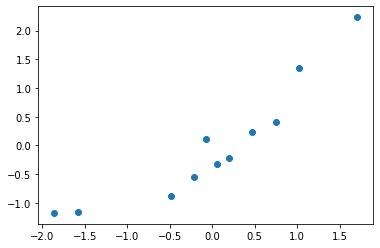

In [12]:
plt.scatter(X[:,0], X[:,1])

In [22]:
from sklearn.metrics import silhouette_score

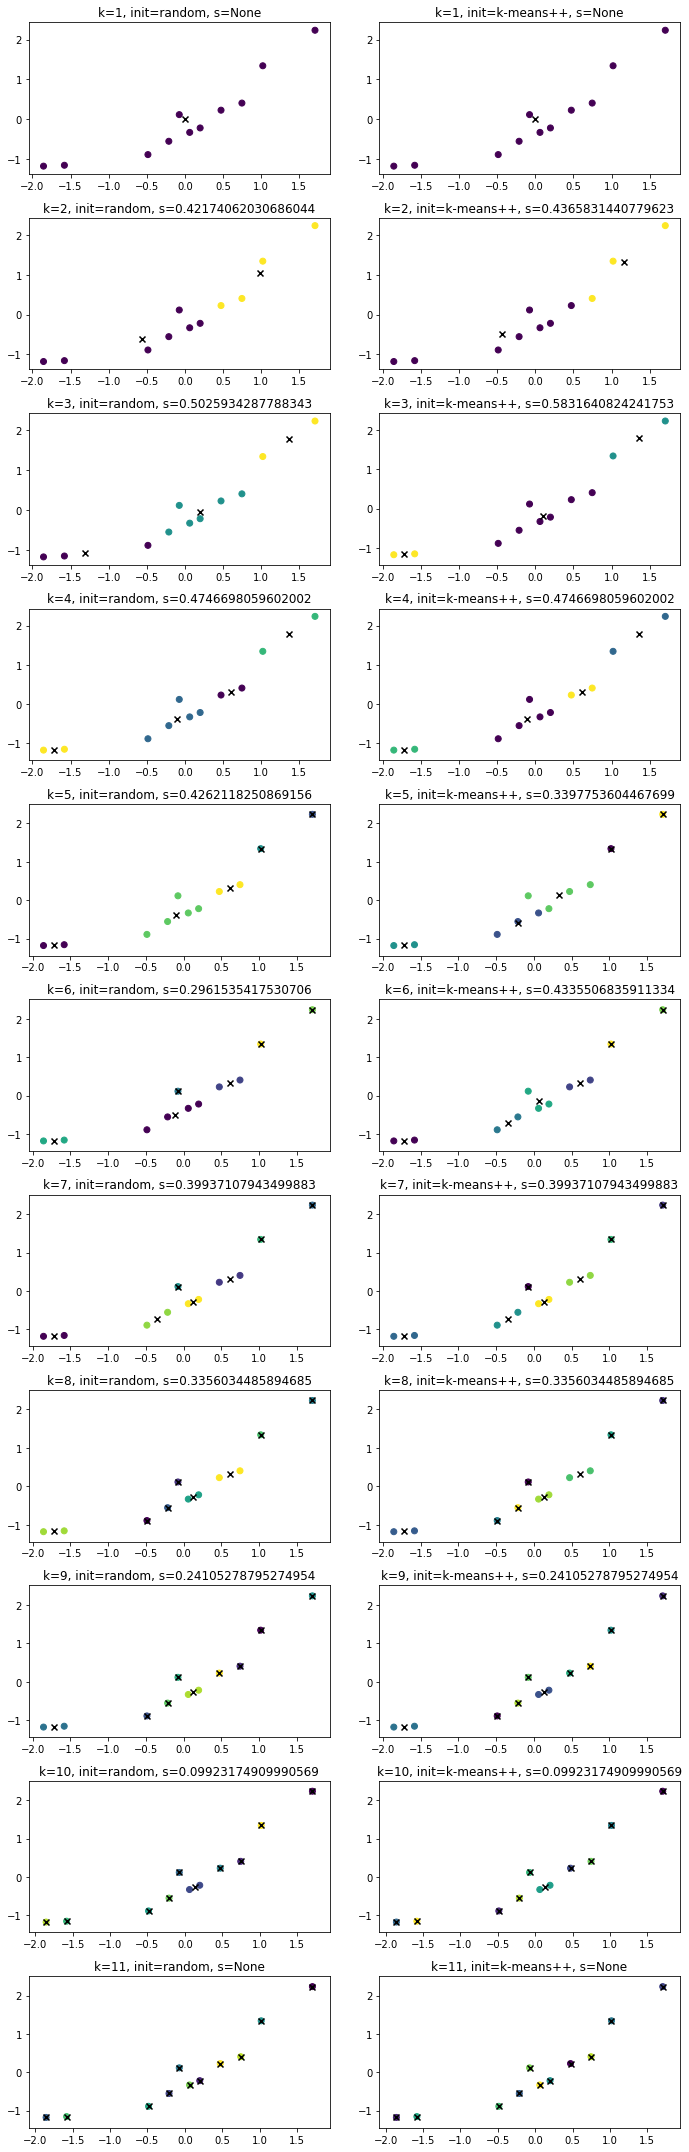

In [27]:
ks = range(1, X.shape[0] + 1)
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
inertias = []
idx = 0
for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init)
        kmeans.fit(X)
        if init == 'random':
            inertias.append(kmeans.inertia_)
    #     print(kmeans.labels_)
    #     print(kmeans.cluster_centers_)
    #     print(kmeans.inertia_)
    #     print('-'*30)
        fig.add_subplot(len(ks), len(inits), idx+1)
        idx += 1
        if k == ks[0] or k == ks[-1]:
            s = None
        else:
            s = silhouette_score(X, kmeans.labels_)
        plt.title(f'k={k}, init={init}, s={s}')
        plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
        plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', color='black')
plt.tight_layout()

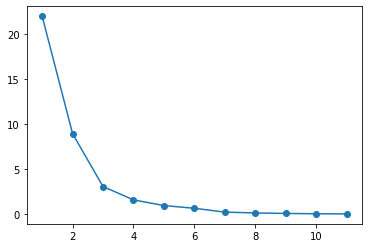

In [29]:
plt.plot(ks, inertias, marker='o')